## 例題

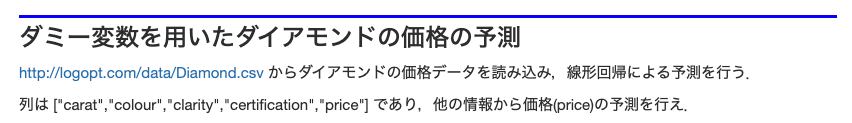

In [1]:
from IPython.display import Image
Image('diamond-prices.png')

## 解答

In [2]:
import pandas as pd

In [3]:
diamond = pd.read_csv('http://logopt.com/data/Diamond.csv', index_col=0)
diamond.head()

,carat,colour,clarity,certification,price
1,0.30,D,VS2,GIA,1302
2,0.30,E,VS1,GIA,1510
3,0.30,G,VVS1,GIA,1510
4,0.30,G,VS1,GIA,1260
5,0.31,D,VS1,GIA,1641


In [4]:
diamond = pd.get_dummies(diamond, drop_first=True)
diamond.head()

,carat,price,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
1,0.30,1302,0,0,0,0,0,0,1,0,0,0,0
2,0.30,1510,1,0,0,0,0,1,0,0,0,0,0
3,0.30,1510,0,0,1,0,0,0,0,1,0,0,0
4,0.30,1260,0,0,1,0,0,1,0,0,0,0,0
5,0.31,1641,0,0,0,0,0,1,0,0,0,0,0


In [5]:
y = diamond.price
X = diamond.drop('price', axis=1)
X.head()

,carat,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
1,0.30,0,0,0,0,0,0,1,0,0,0,0
2,0.30,1,0,0,0,0,1,0,0,0,0,0
3,0.30,0,0,1,0,0,0,0,1,0,0,0
4,0.30,0,0,1,0,0,1,0,0,0,0,0
5,0.31,0,0,0,0,0,1,0,0,0,0,0


In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)
yhat = reg.predict(X)

In [7]:
print("y-切片= ", reg.intercept_)
print("係数 = ", reg.coef_)
print("決定変数= ", reg.score(X, y))

y-切片=  169.17604383491016
係数 =  [12766.39597047 -1439.0853427  -1841.69054716 -2176.67218633
 -2747.14998002 -3313.1023993  -1474.56614749 -1792.01092358
  -689.29043537 -1191.16426364    15.22672874   141.2624469 ]
決定変数=  0.9581280577870392


In [8]:
from yellowbrick.regressor import PredictionError

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


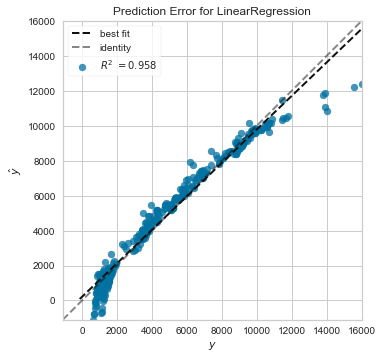

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [9]:
visualizer = PredictionError(reg)

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show()

In [10]:
from yellowbrick.regressor import ResidualsPlot

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


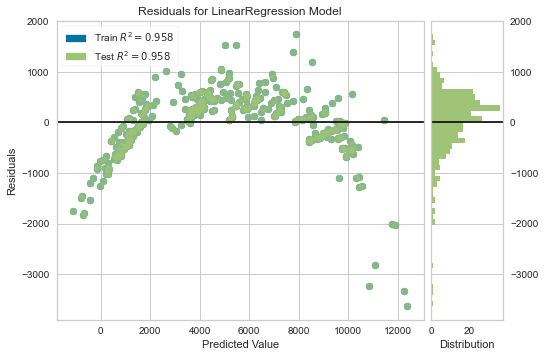

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [11]:
visualizer = ResidualsPlot(reg)

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show()